***
***
***

<br><h1>Apprentice Chef, Inc. Classification  Analysis</h1><br>
<strong>Piya Thavornwong</strong><br>

***
***
***

<strong> Introduction </strong><br>
The main purpose of this analysis is to get insights from customer behavior that been with us for a year. We can apply machine learning to get insights from data and use it to predict the success of promoting Halfway There in the future.

<h2> Exploratory Data Analysis</h2><br>
Import libraries and load the 'Apprentice_Chef_Dataset.xlsx' into Python as apprentice

In [1]:
# importing libraries
import pandas                  as     pd
import numpy                   as     np
import matplotlib.pyplot       as     plt
import seaborn                 as     sns
import statsmodels.formula.api as     smf
import pandas                  as     pd 
import gender_guesser.detector as     gender
from sklearn.model_selection   import train_test_split, GridSearchCV
from sklearn.tree              import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes       import GaussianNB, MultinomialNB
from sklearn.neighbors         import KNeighborsClassifier 
from sklearn.ensemble          import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics           import roc_auc_score, confusion_matrix
from sklearn.preprocessing     import StandardScaler
from sklearn.externals.six     import StringIO   
from sklearn.metrics           import make_scorer
from IPython.display           import Image 
from sklearn.linear_model      import LogisticRegression
import pydotplus       


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice = pd.read_excel(file)



<strong>Explore the data</strong>

See what is in the dataset by using .head() to see the first 5 rows.


In [2]:
apprentice.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,4,1,0,90,135.3,3,1,3,13,253


<strong>Initial Hypothesis</strong>

From the data, I think that there are many variables that important to the success of promoting Halfway There.

- TASTE_AND_PREFERENCES: I think people who specified their tastes and preferences in their profile tend to subscribe to the promotion because they concern about taste. Many people like to drink red wine with steaks and white wine with fishes. According to the article from Early To Rise <a href="https://www.earlytorise.com/5-reasons-love-wine-embmcbk/">5 Reasons I Love Wine… And You Should Too</a>, wine makes food taste better. When you match the right wine with the right food, it is a good paring that helps you enjoy the meal even more.

- Professionals: This promotion is called Halfway There to because customers will receive the wine every Wednesday that is halfway through the workweek. It should be related to people who are working and need to relax during the week. According to the article from Metro <a href="https://metro.co.uk/2019/07/30/red-wine-contains-ingredient-really-relieve-stress-anxiety-study-says-10486421/">Red wine contains an ingredient that really does relieve stress and anxiety</a>, red wine has plant compound resveratrol, which helps relieve stress in the brain because it helped to protect against corticosterone, which was produced when the body is stressed.




<strong>Check the missing data</strong>

First, we check if there is any missing data in each column by using .isnull()


In [3]:
# check the missing value
print(apprentice.isnull().sum())


REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

<strong>Flag and replace</strong>

'FAMILY_NAME' column contains 47 missing values.
Flag the missing data by creating a new column called 'm_FAMILY_NAME'

Then, replace the missing data in 'FAMILY_NAME' by putting 'No_fam_name' in the missing value

In [4]:
# replace the missing value
fill = 'No_fam_name'
apprentice['FAMILY_NAME'] = apprentice['FAMILY_NAME'].fillna(value = fill)


In [5]:
# Flag the missing value
for column in apprentice:

    # creating columns with 1s if missing and 0 if not
    if apprentice[column].isnull().astype(int).sum() > 0:
        
        apprentice['m_'+column] = apprentice[column].isnull().astype(int)
        


<strong>Check the data by using describe()</strong>

Take a look at some statistical information for each variable

In [6]:
apprentice.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,...,2.970709,0.355087,0.113052,35.411100,150.556578,4.436793,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,...,2.744598,0.478663,0.316738,26.577927,49.447180,1.550972,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,33.400000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,10.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,30.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,...,4.000000,1.000000,0.000000,60.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,...,19.000000,1.000000,1.000000,90.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


<strong>Descriptive Analysis</strong><br>

- There is a big gap between 75% and 100% percentile in REVENUE, TOTAL_MEAL_ORDERED, AVG_TIME_PER_SITE_VISIT, CANCELLATION_BEFORE_NOON, WEEKLY_PLAN, LATE_DELIVERIES, AVG_PREP_VID_TIME, LARGEST_ORDER_SIZE, and TOTAL_PHOTO_VIEWED. We can explore what happens behind it further by using a histogram.
<br>
- There is something wrong in the 'LARGEST_ORDER_SIZE' column. From the data dictionary, 'LARGEST_ORDER_SIZE' is the largest number of meals a customer has ordered in a single order. However, the minimum is 0.


Take a look at that data by filtering.


In [7]:
# # filter LARGEST_ORDER_SIZE = 0 to see the observation
# apprentice[apprentice['LARGEST_ORDER_SIZE'] == 0]

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
1086,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,2,0,0,10,33.4,0,0,1,17,0



From the information in the case. There are 2 types of customers

- at least one purchase per month for a total of 11 of their first 12 months
- at least one purchase per quarter and at least 15 purchases throughout their first year

We can assume that the largest order size for this customer is 2 because this customer ordered only 14 meals and contact customer service 12 times. It means that this customer ordered every month.

We can put 2 instead of 0 because this customer has a very low number in revenue.


In [8]:
# Replace 0 to 2 in 'LARGEST_ORDER_SIZE' column
apprentice['LARGEST_ORDER_SIZE'][apprentice['LARGEST_ORDER_SIZE'] == 0] = 2

/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<strong> Determine the variable type</strong>

I decided to specify each variable in to types as follow<br>

<u>Continuous or interval variables</u><br>
REVENUE<br>
TOTAL_MEALS_ORDERED<br>
AVG_TIME_PER_SITE_VISIT<br>
FOLLOWED_RECOMMENDATIONS_PCT<br>
AVG_PREP_VID_TIME<br>
LARGEST_ORDER_SIZE<br>
MEDIAN_MEAL_RATING<br>
AVG_CLICKS_PER_VISIT<br>
MEALS_PER_WEEK<br>
CONTACT_PER_MEAL<br><br>


<u>Binary variables</u><br>
CROSS_SELL_SUCCESS<br>
MOBILE_NUMBER<br>
TASTES_AND_PREFERENCES<br>
PACKAGE_LOCKER<br>
REFRIGERATED_LOCKER<br><br>


<u>Count variables</u><br>
TOTAL_MEALS_ORDERED<br>
UNIQUE_MEALS_PURCH<br>
CONTACTS_W_CUSTOMER_SERVICE<br>
PRODUCT_CATEGORIES_VIEWED<br>
CANCELLATIONS_BEFORE_NOON<br>
CANCELLATIONS_AFTER_NOON<br>
PC_LOGINS<br>
MOBILE_LOGINS<br>
WEEKLY_PLAN<br>
EARLY_DELIVERIES<br>
LATE_DELIVERIES<br>
MASTER_CLASSES_ATTENDED<br>
TOTAL_PHOTOS_VIEWED<br>
TOTAL_CANCELLATIONS<br>
TOTAL_LOGINS<br><br>

<u>Categorical variables</u><br>
DOMAIN_TYPE<br>
GENDER<br><br>



<u>Discrete variable</u><br>
NAME<br>
EMAIL<br>
FIRST_NAME<br>
FAMILY_NAME<br>
EMAIL_DOMAIN<br><br>


<strong> Find the outliers and changes in trends </strong>


Create a histogram of variables to see if there are any outliers in the data.

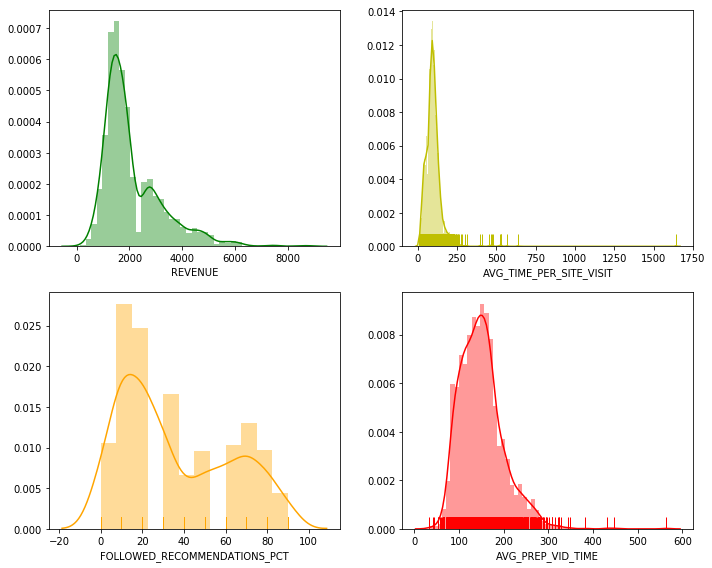

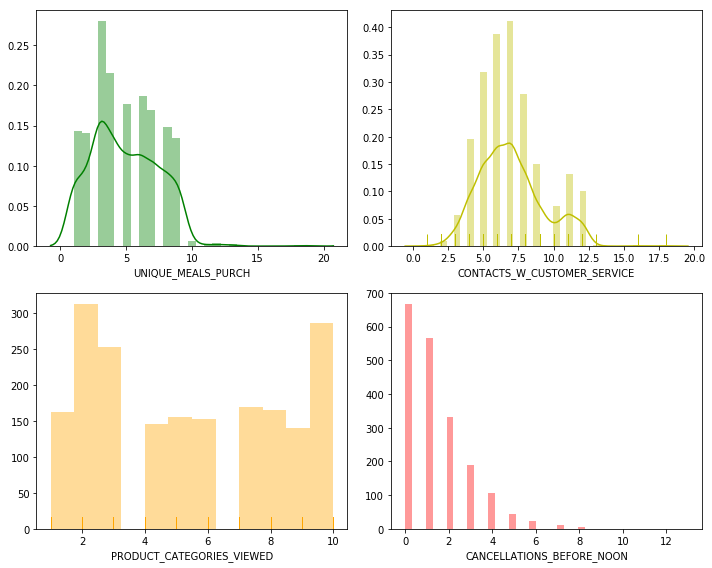

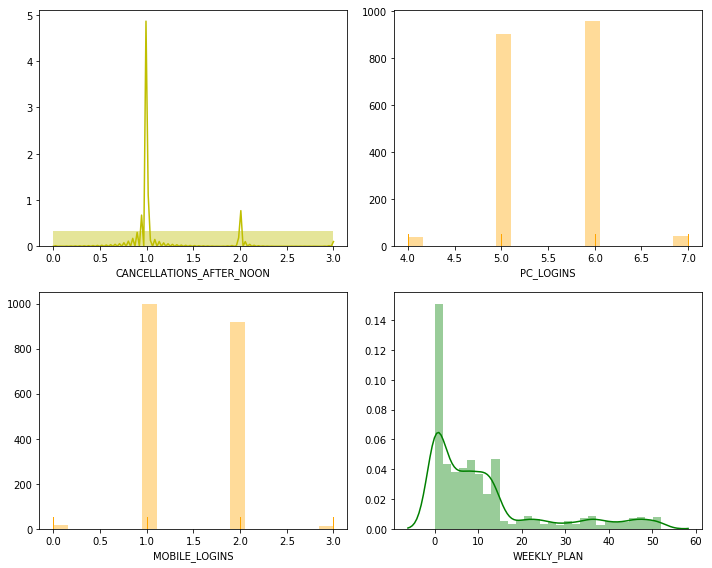

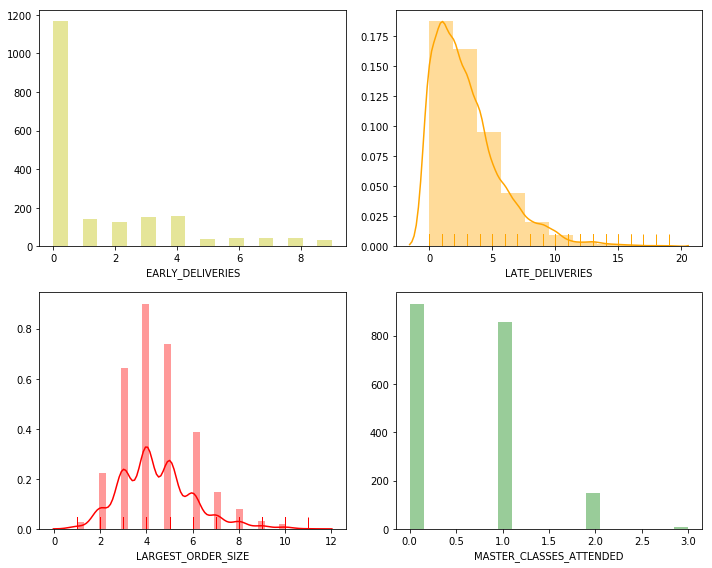

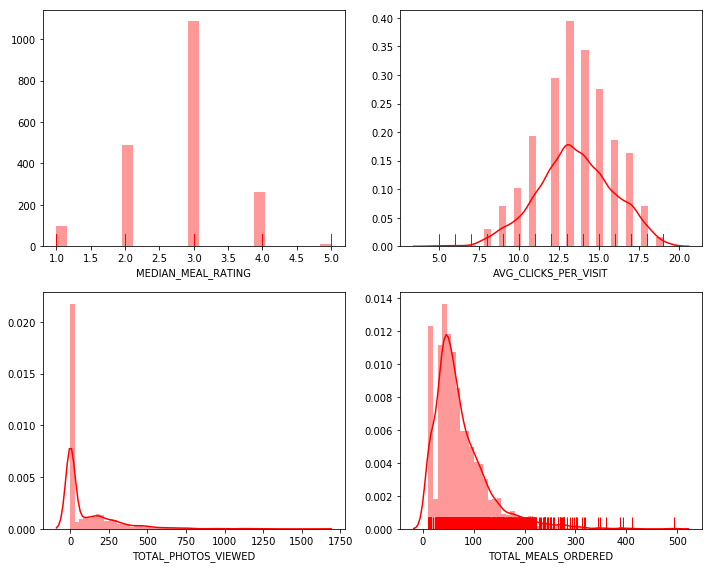

In [9]:
# ########################
# # Visual EDA (Histograms)
# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(apprentice['REVENUE'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('REVENUE')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(apprentice['AVG_TIME_PER_SITE_VISIT'],
#              bins  = 'fd',
#              kde = True ,
#              rug = True ,
#              color = 'y')
# plt.xlabel('AVG_TIME_PER_SITE_VISIT')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(apprentice['FOLLOWED_RECOMMENDATIONS_PCT'],
#              bins  = 'fd',
#              kde   = True,
#              rug   = True,
#              color = 'orange')
# plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

# ########################
# plt.subplot(2, 2, 4)
# sns.distplot(apprentice['AVG_PREP_VID_TIME'],
#              bins  = 'fd',
#              kde   = True,
#              rug   = True,
#              color = 'r')
# plt.xlabel('AVG_PREP_VID_TIME')
# plt.tight_layout()
# plt.show()

# ########################
# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(apprentice['UNIQUE_MEALS_PURCH'],
#              bins  = 'fd',
#              color = 'g')
# plt.xlabel('UNIQUE_MEALS_PURCH')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
#              bins  = 'fd',
#              color = 'y',
#              rug   = True)
# plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(apprentice['PRODUCT_CATEGORIES_VIEWED'],
#              bins  = 'fd',
#              kde   = False,
#              rug   = True,
#              color = 'orange')
# plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

# ########################

# plt.subplot(2, 2, 4)
# sns.distplot(apprentice['CANCELLATIONS_BEFORE_NOON'],
#              bins  = 'fd',
#              kde   = False,
#              rug   = False,
#              color = 'r')
# plt.xlabel('CANCELLATIONS_BEFORE_NOON')
# plt.tight_layout()
# plt.show()

# ########################
# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(apprentice['CANCELLATIONS_AFTER_NOON'],
#              bins  = 'fd',
#              rug   = False,
#              color = 'y')
# plt.xlabel('CANCELLATIONS_AFTER_NOON')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(apprentice['PC_LOGINS'],
#              bins  = 'fd',
#              kde   = False,
#              rug   = True,
#              color = 'orange')
# plt.xlabel('PC_LOGINS')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(apprentice['MOBILE_LOGINS'],
#              bins  = 'fd',
#              kde   = False,
#              rug   = True,
#              color = 'orange')
# plt.xlabel('MOBILE_LOGINS')

# ########################

# plt.subplot(2, 2, 4)
# sns.distplot(apprentice['WEEKLY_PLAN'],
#              bins  = 'fd',
#              kde   = True,
#              color = 'g')
# plt.xlabel('WEEKLY_PLAN')
# plt.tight_layout()
# plt.show()

# ########################
# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(apprentice['EARLY_DELIVERIES'],
#              bins  = 'fd',
#              kde   = False,
#              color = 'y')
# plt.xlabel('EARLY_DELIVERIES')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(apprentice['LATE_DELIVERIES'],
#              bins = 10,
#              kde  = True,
#              rug  = True,
#              color = 'orange')
# plt.xlabel('LATE_DELIVERIES')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(apprentice['LARGEST_ORDER_SIZE'],
#              bins = 'fd',
#              kde  = True,
#              rug  = True,
#              color = 'r')
# plt.xlabel('LARGEST_ORDER_SIZE')

# ########################

# plt.subplot(2, 2, 4)
# sns.distplot(apprentice['MASTER_CLASSES_ATTENDED'],
#              bins  = 'fd',
#              kde   = False,
#              color = 'g')
# plt.xlabel('MASTER_CLASSES_ATTENDED')
# plt.tight_layout()
# plt.show()

# ########################
# ########################

# fig, ax = plt.subplots(figsize = (10, 8))
# plt.subplot(2, 2, 1)
# sns.distplot(apprentice['MEDIAN_MEAL_RATING'],
#              bins  = 'fd',
#              kde   = False,
#              rug   = True,
#              color = 'r')
# plt.xlabel('MEDIAN_MEAL_RATING')

# ########################

# plt.subplot(2, 2, 2)
# sns.distplot(apprentice['AVG_CLICKS_PER_VISIT'],
#              bins  = 'fd',
#              kde   = True,
#              rug   = True,
#              color = 'r')
# plt.xlabel('AVG_CLICKS_PER_VISIT')

# ########################

# plt.subplot(2, 2, 3)
# sns.distplot(apprentice['TOTAL_PHOTOS_VIEWED'],
#              bins  = 'fd',
#              kde   = True,
#              rug   = False,
#              color = 'r')
# plt.xlabel('TOTAL_PHOTOS_VIEWED')

# ########################

# plt.subplot(2, 2, 4)
# sns.distplot(apprentice['TOTAL_MEALS_ORDERED'],
#              bins  = 'fd',
#              kde   = True,
#              rug   = True,
#              color = 'r')
# plt.xlabel('TOTAL_MEALS_ORDERED')

# plt.tight_layout()
# plt.show()

<br>
Next, see the changes in trends of being 1 or 0 in "CROSS_SELL_SUCCESS" by using a violin plot. <br>
I decided to compare "CROSS_SELL_SUCCESS" with "CANCELLATION_BEFORE_NOON" and "FOLLOWED_RECOMMENDATION_PCT" to see what happened with these variables.
<br>

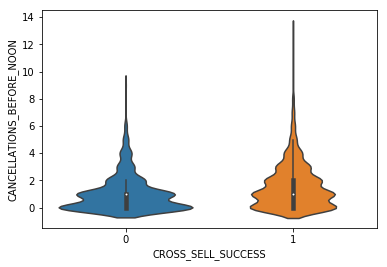

In [10]:
#plot a violin plot
sns.violinplot(x="CROSS_SELL_SUCCESS",
               y="CANCELLATIONS_BEFORE_NOON",
               data=apprentice)

plt.show()

<br>
From the violin graph above, The trend changed after "CANCELLATIONS_BEFORE_NOON" more than 2. This might be a good point to flag the trend change.
<br>

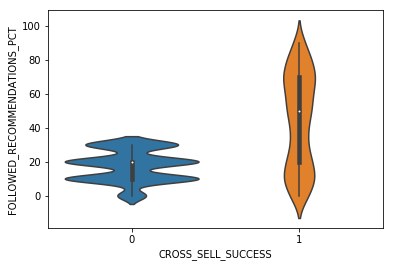

In [11]:
# plot a violin plot
sns.violinplot(x="CROSS_SELL_SUCCESS",
               y="FOLLOWED_RECOMMENDATIONS_PCT",
               data=apprentice)

plt.show()

<br>
From the violin graph above, The trend changed after "FOLLOWED_RECOMMENDATIONS_PCT" more than 30. This might be a good point to flag the trend change.
<br>


<strong> Flag the outliers </strong>

The graphs above show some variables that I think it is important to treat some of the data as outliers.<br>

Create new columns by flagging the outliers in each variable.


In [12]:
# Set the outlier 
FOLLOWED_RECOMMENDATIONS_PCT_hi = 20
WEEKLY_PLAN_hi                  = 15
CANCELLATIONS_BEFORE_NOON_hi    = 2 

# REVENUE_hi                      = 5000
# TOTAL_MEALS_ORDERED_hi          = 325
# UNIQUE_MEALS_PURCH_hi           = 9 
# CONTACTS_W_CUSTOMER_SERVICE_hi  = 10 
# AVG_TIME_PER_SITE_VISIT_hi      = 350 
# CANCELLATIONS_AFTER_NOON_hi     = 1 
# PC_LOGINS_hi                    = 6 
# MOBILE_LOGINS_hi                = 2 
# EARLY_DELIVERIES_hi             = 7 
# LATE_DELIVERIES_hi              = 9 
# AVG_PREP_VID_TIME_hi            = 400
# LARGEST_ORDER_SIZE_hi           = 9 
# MASTER_CLASSES_ATTENDED_hi      = 2 
# MEDIAN_MEAL_RATING_hi           = 4 
# AVG_CLICKS_PER_VISIT_hi         = 18 
# TOTAL_PHOTOS_VIEWED_hi          = 500



# TOTAL_MEALS_ORDERED_lo         = 20
# CONTACTS_W_CUSTOMER_SERVICE_lo = 3 
# PC_LOGINS_lo                   = 5 
# MOBILE_LOGINS_lo               = 1 
# AVG_CLICKS_PER_VISIT_lo        = 8 

# Create a list of columns that have outlier in the higher side
column_lst = [#['REVENUE', REVENUE_hi],
#               ['TOTAL_MEALS_ORDERED', TOTAL_MEALS_ORDERED_hi],
#               ['UNIQUE_MEALS_PURCH', UNIQUE_MEALS_PURCH_hi],
#               ['CONTACTS_W_CUSTOMER_SERVICE', CONTACTS_W_CUSTOMER_SERVICE_hi],
#               ['AVG_TIME_PER_SITE_VISIT', AVG_TIME_PER_SITE_VISIT_hi],
#               ['CANCELLATIONS_BEFORE_NOON', CANCELLATIONS_BEFORE_NOON_hi],
#               ['CANCELLATIONS_AFTER_NOON', CANCELLATIONS_AFTER_NOON_hi],
#               ['PC_LOGINS', PC_LOGINS_hi],
#               ['MOBILE_LOGINS', MOBILE_LOGINS_hi],
              ['WEEKLY_PLAN', WEEKLY_PLAN_hi],
#               ['EARLY_DELIVERIES', EARLY_DELIVERIES_hi],
#               ['LATE_DELIVERIES', LATE_DELIVERIES_hi],
#               ['AVG_PREP_VID_TIME', AVG_PREP_VID_TIME_hi],
#               ['LARGEST_ORDER_SIZE', LARGEST_ORDER_SIZE_hi],
#               ['MASTER_CLASSES_ATTENDED', MASTER_CLASSES_ATTENDED_hi],
#               ['MEDIAN_MEAL_RATING', MEDIAN_MEAL_RATING_hi],
#               ['AVG_CLICKS_PER_VISIT', AVG_CLICKS_PER_VISIT_hi],
#               ['TOTAL_PHOTOS_VIEWED', TOTAL_PHOTOS_VIEWED_hi],
              ['FOLLOWED_RECOMMENDATIONS_PCT', FOLLOWED_RECOMMENDATIONS_PCT_hi]
             ]
              
# Create new columns with the flagged data by using for loop
for col, hi in column_lst:
    
    apprentice['out_hi_' + col] = 0
    
    condition = apprentice.loc[0:,'out_hi_' + col][apprentice[col] > hi]

    apprentice['out_hi_' + col].replace(to_replace = condition,
                                        value      = 1,
                                        inplace    = True)

    
# # Create a list of columns that have outlier in the higher side
# column_lst = [['TOTAL_MEALS_ORDERED', TOTAL_MEALS_ORDERED_lo],
#               ['PC_LOGINS', PC_LOGINS_lo],
#               ['MOBILE_LOGINS', MOBILE_LOGINS_lo],
#               ['CONTACTS_W_CUSTOMER_SERVICE', CONTACTS_W_CUSTOMER_SERVICE_lo],
#               ['AVG_CLICKS_PER_VISIT', AVG_CLICKS_PER_VISIT_lo],]
              
# # Create new columns with the flagged data by using for loop
# for col, lo in column_lst:
    
#     apprentice['out_lo_' + col] = 0
    
#     condition = apprentice.loc[0:,'out_lo_' + col][apprentice[col] < lo]

#     apprentice['out_lo_' + col].replace(to_replace = condition,
#                                         value      = 1,
#                                         inplace    = True)



<strong>Find trend changes by using Box plot </strong>

I want to look at the mean of "CROSS_SELL_SUCCESS" at each point in each variable.<br>

So, I created a box plot to visualize it


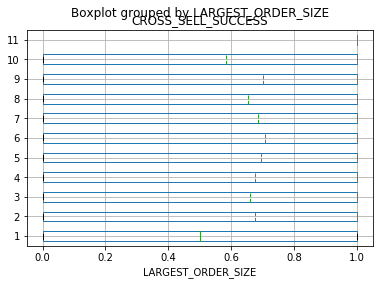

In [13]:
# calling the function for each categorical variable
apprentice.boxplot('CROSS_SELL_SUCCESS',
                   'LARGEST_ORDER_SIZE',
                   vert      = False,
                   meanline  = True,
                   showmeans = True)
plt.show()

<br>
From the graph above, we can see the drop from 0.7 to 0.5 for customers who have 1 in "LARGEST_ORDER_SIZE".<br>

In [14]:
# create a new column
apprentice['LARGEST_ORDER_SIZE_at'] = 0

# filter for only "LARGEST_ORDER_SIZE" = 1 to flag in the new column
apprentice['LARGEST_ORDER_SIZE_at'][apprentice['LARGEST_ORDER_SIZE'] == 1] = 1

/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<h2> Feature Engineering</h2>

Create new following columns
1. avg_meal_price : To see the average amount that customers pay per meal.
2. avg_order_size: To see the average order size (amount of meals) of customers per order.


In [15]:
# Create new variables
apprentice['avg_meal_price'] = apprentice['REVENUE']/apprentice['TOTAL_MEALS_ORDERED']
apprentice['avg_order_size'] = apprentice['TOTAL_MEALS_ORDERED']/apprentice['LARGEST_ORDER_SIZE']



<strong>Categorical data</strong>

The marketing team decided to separate emails of customers into categories (personal, professional, and junk).<br>
With the email data from each customer, we can separate them into groups to see if it impact the subscription of promotion or not.


In [16]:
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice.loc[index, 'EMAIL'].split(sep = "@")
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

In [17]:
# Create dummies variables for categorical data and then drop the original columns

# make a list of the domain name of each category
professional_email_domains = ['@mmm.com',
                              '@amex.com',
                              '@apple.com',
                              '@boeing.com',
                              '@caterpillar.com',
                              '@chevron.com',
                              '@cisco.com',
                              '@cocacola.com',
                              '@disney.com',
                              '@dupont.com',
                              '@exxon.com',
                              '@ge.org',
                              '@goldmansacs.com',
                              '@homedepot.com',
                              '@ibm.com',
                              '@intel.com',
                              '@jnj.com',
                              '@jpmorgan.com',
                              '@mcdonalds.com',
                              '@merck.com',
                              '@microsoft.com',
                              '@nike.com',
                              '@pfizer.com',
                              '@pg.com',
                              '@travelers.com',
                              '@unitedtech.com',
                              '@unitedhealth.com',
                              '@verizon.com',
                              '@visa.com',
                              '@walmart.com']

personal_email_domains  = ['@gmail.com',
                           '@yahoo.com',
                           '@protonmail.com']


junk_email_domains  = ['@me.com',
                       '@aol.com',
                       '@hotmail.com',
                       '@live.com',
                       '@msn.com',
                       '@passport.com']



# create a list to record the information
placeholder_lst = []


# looping to group observations by domain type
for domain in email_df[1]:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
        
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk') 
            
        else:
            print('unknown')

# concatenating with original DataFrame
apprentice['domain_group'] = pd.Series(placeholder_lst)


# checking results
apprentice['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

<br>
Next, I used gender_guesser to grouped customers by genders.<br> According to the news from CNBC<a href="https://www.cnbc.com/2015/11/23/male-female-drinking-habits-becoming-more-similar-study.html">Male, Female Drinking Habits Becoming More Similar</a>, “In the United States, males drink more often and more heavily than females, consuming greater than twice as much alcohol per year (18 liters of pure alcohol for males, 7.8 liters for females)”<br><br>
This might tell us that male will have a higher chance to subscribe more than female.<br>

In [ ]:
# placeholder_lst = []


# # looping to guess gender
# for name in apprentice['FIRST_NAME']:
#     guess = gender.Detector().get_gender(name)
#     placeholder_lst.append(guess)


# # converting list into a series
# apprentice['gender_guess'] = pd.Series(placeholder_lst)


# # record the data to a list
#  lst_gender = apprentice['gender_guess']

In [18]:
# Use the record the data in a list
gender = ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'female', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'female', 'female', 'unknown', 'unknown', 'female', 'unknown', 'male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'mostly_female', 'female', 'unknown', 'unknown', 'unknown', 'female', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'male', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'male', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'mostly_male', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_female', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'male', 'unknown', 'female', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'mostly_female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'female', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'mostly_female', 'mostly_female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'female', 'male', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'female', 'unknown', 'mostly_female', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'female', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'female', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown']


In [19]:
# create a new column
apprentice['gender_guess'] = gender

In [20]:
# convert selected variables to categorical variables
apprentice_dummies = pd.get_dummies(apprentice[['domain_group','gender_guess']],
                                    drop_first= True)

# join the categorical variables that just created
apprentice = apprentice.join(apprentice_dummies)

<br>
I decided to check at the mean of "CROSS_SELL_SUCCESS" between male, female, mostly_male, and mostly_female to see if there is any trends behind it.
<br>

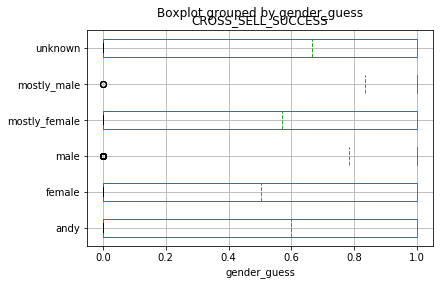

In [21]:
# calling the function for each categorical variable
apprentice.boxplot('CROSS_SELL_SUCCESS',
                   'gender_guess',
                   vert      = False,
                   meanline  = True,
                   showmeans = True)

plt.show()

<br>
After I look at the mean of "CROSS_SELL_SUCCESS" for "gender_guess", the mean of 'mostly_male' and 'male' are similar, also for 'mostly_female' and 'female'. So, I group them together as 'male' and 'female'<br>
<br>

In [22]:
# create new columns
apprentice['male']   = 0
apprentice['female'] = 0

In [23]:
# filter for only male and mostly_male and flag it in the new column
apprentice['male'][apprentice['gender_guess_male'] == 1]        = 1
apprentice['male'][apprentice['gender_guess_mostly_male'] == 1] = 1

# filter for only female and mostly_female and flag it in the new column
apprentice['female'][apprentice['gender_guess_female'] == 1]        = 1
apprentice['female'][apprentice['gender_guess_mostly_female'] == 1] = 1

/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Piya/anaconda3/lib/python3.7/site-pack

In [24]:
# drop the original columns
apprentice = apprentice.drop(['domain_group','gender_guess'],
                             axis = 1)

<strong> Correlation </strong><br><br>
Let's look at the correlation of variables with CROSS_SELL_SUCCESS.<br><br>
The variable that has the strongest correlation is FOLLOWED_RECOMMENDATION_PCT. The more percentage of time customers followed our meal recommendations, the more likely they will subscribe to Halfway There promotion. Moreover, the customers who are using the professional email domain to register for the account tend to subscribe to the promotion.


In [25]:
# find the correlation in this dataset
df_corr = apprentice.corr().round(2)
df_corr

# show the correlations with SalePrice
print(df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                     1.00
FOLLOWED_RECOMMENDATIONS_PCT           0.46
out_hi_FOLLOWED_RECOMMENDATIONS_PCT    0.40
domain_group_professional              0.19
CANCELLATIONS_BEFORE_NOON              0.16
male                                   0.12
gender_guess_male                      0.11
MOBILE_NUMBER                          0.10
TASTES_AND_PREFERENCES                 0.08
REFRIGERATED_LOCKER                    0.07
CONTACTS_W_CUSTOMER_SERVICE            0.04
gender_guess_mostly_male               0.04
PACKAGE_LOCKER                         0.04
MASTER_CLASSES_ATTENDED                0.04
PC_LOGINS                              0.04
domain_group_personal                  0.04
MEDIAN_MEAL_RATING                     0.03
AVG_PREP_VID_TIME                      0.03
LARGEST_ORDER_SIZE                     0.02
EARLY_DELIVERIES                       0.02
TOTAL_PHOTOS_VIEWED                    0.01
TOTAL_MEALS_ORDERED                    0.01
AVG_TIME_PER_SITE_VISIT         

<strong>Prepare the data for the model</strong>

Group the RHS variables, and select the "CROSS_SELL_SUCCESS" as a target variable.<br>
Then, do the train/test split and concatenate variables into train and test datasets.

In [26]:
# preparing RHS variables
apprentice_data = apprentice.drop('CROSS_SELL_SUCCESS', axis = 1)


# preparing response variable
apprentice_target = apprentice.loc[:, 'CROSS_SELL_SUCCESS']


# running train/test split
X_train, X_test, y_train, y_test = train_test_split(apprentice_data,
                                                    apprentice_target,
                                                    test_size    = 0.25,
                                                    stratify     = apprentice_target,
                                                    random_state = 222)

# concatinate RHS variables and target variable in to train and test data set
apprentice_train = pd.concat([X_train, y_train], axis = 1)
apprentice_test  = pd.concat([X_test, y_test],   axis = 1)


In [ ]:
# for val in apprentice:
#     print(f"apprentice_train['{val}'] +")


<h2> Variable selection </h2>

Use Logit from statsmodels to do the logistic regression analysis by putting all variables to predict 'CROSS_SELL_SUCCESS'.<br>
Then, drop variables with the high p-value one by one.<br><br>

I ended up with 12 variables with low p-value and gave me Pseudo R2 of 0.334 for the train data. These are the variables that I will put it in each model to compare.


In [27]:
# set the LHS and RHS variables for the logistic regression
cl_reg  = smf.logit(formula = """CROSS_SELL_SUCCESS ~   apprentice_train['MOBILE_NUMBER'] +
                                                        apprentice_train['CANCELLATIONS_BEFORE_NOON'] +
                                                        apprentice_train['CANCELLATIONS_AFTER_NOON'] +
                                                        apprentice_train['MOBILE_LOGINS'] +
                                                        apprentice_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                                        apprentice_train['out_hi_WEEKLY_PLAN'] +
                                                        apprentice_train['out_hi_FOLLOWED_RECOMMENDATIONS_PCT'] +
                                                        apprentice_train['LARGEST_ORDER_SIZE_at'] +
                                                        apprentice_train['domain_group_personal'] +
                                                        apprentice_train['domain_group_professional'] +
                                                        apprentice_train['male'] +
                                                        apprentice_train['female']
                                                         """,
                                 data = apprentice_train)


# fit the model
results = cl_reg.fit()


# printing the results
results.summary()

Optimization terminated successfully.
         Current function value: 0.418197
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1446
Method:                           MLE   Df Model:                           12
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3340
Time:                        17:57:05   Log-Likelihood:                -610.15
converged:                       True   LL-Null:                       -916.19
                                        LLR p-value:                2.778e-123
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -2.9832      0.357     -8.351      0.000      -3.683      -2.283
apprentice_train['MOBILE_NUMBER']                           0.9415      0.209      4.511      0.000       0.532       1.351
apprentice_train['CANCELLATIONS_BEFORE_NOON']               0.2348      0.051      4.600      0.000       0.135       0.335
apprentice_train['CANCELLATIONS_AFTER_NOON']               -0.3303      0.158     -2.094      0.036      -0.639      -0.021
apprentice_train['MOBILE_LOGINS']                          -0.3244      0.133     -2.433      0.015      -0.586      -0.063
apprentice_train['FOLLOWED_RECOMMENDATIONS_PCT']            0.0808      0.007     10.997      0.000       0.066       0.095
apprentice_train['out_hi_WEEKLY_PLAN']                      0.3775      0.175      2.161      0.031       0.035       0.720
apprentice_train['out_hi_FOLLOWED_RECOMMENDATIONS_PCT']    -0.8999      0.252     -3.576      0.000      -1.393      -0.407
apprentice_train['LARGEST_ORDER_SIZE_at']                  -1.6451      0.735     -2.240      0.025      -3.085      -0.205
apprentice_train['domain_group_personal']                   1.2870      0.182      7.054      0.000       0.929       1.645
apprentice_train['domain_group_professional']               1.9767      0.200      9.900      0.000       1.585       2.368
apprentice_train['male']                                    0.7460      0.190      3.922      0.000       0.373       1.119
apprentice_train['female']                                 -1.1519      0.265     -4.354      0.000      -1.670      -0.633
===========================================================================================================================
"""



<strong>Export the file to put in the model</strong>


In [ ]:
# # export file to 'apprentice_featured.xlsx'
# apprentice.to_excel('apprentice_featured.xlsx',index = False)

<h2>Preparing the data for the models</h2><br><br>

In [ ]:
# # read the file with featured variables
# apprentice = pd.read_excel('apprentice_featured.xlsx')

<br>
I created 2 sets of variables to put it in the model.<br><br>
1. The variables that we got from the previous section with a significant p-value<br>
2. All of the variables that we have in our dataset<br>
<br>

In [28]:
# create a dictionary
candidate_dict = {

 # significant variables only
    'logit_sig'  : ['MOBILE_NUMBER',
                    'CANCELLATIONS_BEFORE_NOON',
                    'CANCELLATIONS_AFTER_NOON',
                    'MOBILE_LOGINS',
                    'FOLLOWED_RECOMMENDATIONS_PCT',
                    'out_hi_WEEKLY_PLAN',
                    'out_hi_FOLLOWED_RECOMMENDATIONS_PCT',
                    'LARGEST_ORDER_SIZE_at',
                    'domain_group_personal',
                    'domain_group_professional',
                    'male',
                    'female'],
 
 # every variables
    'logit_full' : ['REVENUE',
                    'TOTAL_MEALS_ORDERED',
                    'UNIQUE_MEALS_PURCH',
                    'CONTACTS_W_CUSTOMER_SERVICE',
                    'PRODUCT_CATEGORIES_VIEWED',
                    'AVG_TIME_PER_SITE_VISIT',
                    'MOBILE_NUMBER',
                    'CANCELLATIONS_BEFORE_NOON',
                    'CANCELLATIONS_AFTER_NOON',
                    'TASTES_AND_PREFERENCES',
                    'PC_LOGINS',
                    'MOBILE_LOGINS',
                    'WEEKLY_PLAN',
                    'EARLY_DELIVERIES',
                    'LATE_DELIVERIES',
                    'PACKAGE_LOCKER',
                    'REFRIGERATED_LOCKER',
                    'FOLLOWED_RECOMMENDATIONS_PCT',
                    'AVG_PREP_VID_TIME',
                    'LARGEST_ORDER_SIZE',
                    'MASTER_CLASSES_ATTENDED',
                    'MEDIAN_MEAL_RATING',
                    'AVG_CLICKS_PER_VISIT',
                    'TOTAL_PHOTOS_VIEWED',
                    'out_hi_WEEKLY_PLAN',
                    'out_hi_FOLLOWED_RECOMMENDATIONS_PCT',
                    'LARGEST_ORDER_SIZE_at',
                    'avg_meal_price',
                    'avg_order_size',
                    'domain_group_personal',
                    'domain_group_professional',
                    'gender_guess_female',
                    'gender_guess_male',
                    'gender_guess_mostly_female',
                    'gender_guess_mostly_male',
                    'gender_guess_unknown',
                    'male',
                    'female']}



I select the p-value significant variables from the previous section and do the train test split again.

In [29]:
# preparing RHS variables
apprentice_data = apprentice.loc[:, candidate_dict['logit_sig']]


# preparing response variable
apprentice_target = apprentice.loc[:, 'CROSS_SELL_SUCCESS']


# running train/test split
X_train, X_test, y_train, y_test = train_test_split(apprentice_data,
                                                    apprentice_target,
                                                    test_size    = 0.25,
                                                    random_state = 222,
                                                    stratify     = apprentice_target)


<strong>Model Comparing</strong><br><br>

I put the selected variables from the previous section and put it in each model. <br>
I decided to use 
- LogisticRegression<br>
- KNeighborsClassifier<br>
- DecisionTreeClassifier<br>
- RandomForestClassifier<br>
- GradientBoostingClassifier <br>

to see which one is the best.<br><br>
In addition, I use .predict_proba() instead of .predict() to get the actual probability of the predicted value.

<br>


In [30]:
# create a list of model that will test
models = [['Logit', LogisticRegression(random_state= 222)],
          ['KNN', KNeighborsClassifier()],
          ['Tree', DecisionTreeClassifier(random_state= 222)],
          ['RF', RandomForestClassifier(random_state=222)],
          ['GB', GradientBoostingClassifier()]]

# create empty lists to store the results
model_name  = []
train_score = []
test_score  = []
auc_score   = []

# crate a loop to test each model
for name, model in models:
    # FITTING to the training data
    model_fit = model.fit(X_train, y_train)


    # PREDICTING on new data
    model_pred = model_fit.predict_proba(X_test)[:,1]

    # SCORING the results
    model_name.append(name)
    train_score.append(model.score(X_train, y_train).round(4))
    test_score.append(model.score(X_test, y_test).round(4))
    auc_score.append(roc_auc_score(y_true  = y_test,
                                   y_score = model_pred).round(4))

# put all the result as a dataframe
model_compare = pd.DataFrame({'model'      : model_name,
                              'train_score': train_score,
                              'test_score' : test_score,
                              'AUC_score'  : auc_score})

model_compare

/Users/Piya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Piya/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,model,train_score,test_score,AUC_score
0,Logit,0.7711,0.7556,0.8337
1,KNN,0.8506,0.7864,0.8677
2,Tree,0.9191,0.7556,0.7784
3,RF,0.9123,0.7741,0.8584
4,GB,0.8444,0.8070,0.8883


<br>
From the table above, we can see that Gradient Boosting gave us the best AUC_score. This model will be our candidate for hyperparameter tuning.
<br>

<br>
Next, I selected the every variables that we have in the dataset, do the train test split again, and put in the model and see if it performs better than the significant variables.
<br>

In [31]:
# preparing RHS variables
apprentice_data = apprentice.loc[:, candidate_dict['logit_full']]


# preparing response variable
apprentice_target = apprentice.loc[:, 'CROSS_SELL_SUCCESS']


# running train/test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(apprentice_data,
                                                                        apprentice_target,
                                                                        test_size = 0.25,
                                                                        random_state = 222,
                                                                        stratify = apprentice_target)


In [32]:
# create a list of model that will test
models = [['Logit', LogisticRegression()],
          ['KNN', KNeighborsClassifier()],
          ['Tree', DecisionTreeClassifier(random_state= 222)],
          ['RF', RandomForestClassifier(random_state=222)],
          ['GB', GradientBoostingClassifier()]]

# create empty lists to store the results
model_name  = []
train_score = []
test_score  = []
auc_score   = []

for name, model in models:
    # FITTING to the training data
    model_fit_full = model.fit(X_train_full, y_train_full)


    # PREDICTING on new data
    model_pred_full = model_fit_full.predict_proba(X_test_full)[:,1]

    # SCORING the results
    model_name.append(name)
    train_score.append(model.score(X_train_full, y_train_full).round(4))
    test_score.append(model.score(X_test_full, y_test_full).round(4))
    auc_score.append(roc_auc_score(y_true  = y_test_full, 
                                   y_score = model_pred_full).round(4))

# put all the results as a dataframe
model_compare = pd.DataFrame({'model'      : model_name,
                              'train_score': train_score,
                              'test_score' : test_score,
                              'AUC_score'  : auc_score})

model_compare

/Users/Piya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Piya/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,model,train_score,test_score,AUC_score
0,Logit,0.7800,0.7474,0.8315
1,KNN,0.7738,0.6345,0.5996
2,Tree,1.0000,0.7639,0.7365
3,RF,0.9918,0.7577,0.8295
4,GB,0.9013,0.7844,0.8825


<br>
The full variable set returns me slightly the same in AUC_score for the Gradient Boosting model. I decided that the significant variable set is better because there are fewer variables that I can explain why it affects the result.
<br>

<br>
I also tried to use StandartScaler() to scaling the data and see if it provide me a better result.
<br>

In [33]:
# preparing RHS variables
apprentice_data = apprentice.loc[:, candidate_dict['logit_sig']]


# preparing response variable
apprentice_target = apprentice.loc[:, 'CROSS_SELL_SUCCESS']


# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(apprentice_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(apprentice_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_df,
                                                                                apprentice_target,
                                                                                random_state = 802,
                                                                                test_size = 0.25,
                                                                                stratify = apprentice_target)

/Users/Piya/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [34]:
# create a list of model that will test
models_scaled = [['KNN', KNeighborsClassifier()],
                 ['Logit', LogisticRegression()],
                 ['Tree', DecisionTreeClassifier(random_state= 222)],
                 ['RF', RandomForestClassifier(random_state=222)],
                 ['GB', GradientBoostingClassifier()]]

# create empty lists to store the results
model_name  = []
train_score = []
test_score  = []
auc_score   = []

for name, model_scaled in models_scaled:
    # FITTING to the training data
    model_scaled_fit = model_scaled.fit(X_train, y_train)


    # PREDICTING on new data
    model_scaled_pred = model_scaled_fit.predict_proba(X_test)[:,1]

    # SCORING the results
    model_name.append(name)
    train_score.append(model_scaled.score(X_train_scaled, y_train_scaled).round(4))
    test_score.append(model_scaled.score(X_test_scaled, y_test_scaled).round(4))
    auc_score.append(roc_auc_score(y_true  = y_test_scaled,
                                   y_score = model_scaled_pred).round(4))

# put all the results as a dataframe
model_scaled_compare = pd.DataFrame({'model'      : model_name,
                                     'train_score': train_score,
                                     'test_score' : test_score,
                                     'AUC_score'  : auc_score})

model_scaled_compare

/Users/Piya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Piya/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,model,train_score,test_score,AUC_score
0,KNN,0.6367,0.6201,0.4984
1,Logit,0.3859,0.3860,0.5154
2,Tree,0.3585,0.3511,0.5284
3,RF,0.3701,0.3758,0.5148
4,GB,0.4517,0.4374,0.5066


<br>
The StandartScaler() returns worst results comparing to the previous approaches. So, I decided not to do the scaling.
<br>

<br>
<strong>Hyperparameter Tuning</strong><br>

I decided to use the Gradient Boosting model with p-value significant variables to do the hyperparameter Tuning.<br><br>
I selected to adjust<br>
- learning_rate<br>
- n_estimators<br>
- max_depth<br>
- subsample<br>

I use GridSearchCV() to test every possible combination of parameters and select the set the give me the best roc_auc_score.
<br>

In [35]:
# # declaring a hyperparameter space
# learn_space     = pd.np.arange(0.05, 0.11, 0.01)
# estimator_space = pd.np.arange(160, 190, 5)
# depth_space     = pd.np.arange(1, 3)
# sample_space    = pd.np.arange(0.6, 0.9, 0.05)


# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_space,
#               'max_depth'     : depth_space,
#               'n_estimators'  : estimator_space,
#               'subsample'     : sample_space}

# # for eta in min_samples_leaf:
# gb_model = GradientBoostingClassifier(random_state= 222)

# gb_cv = GridSearchCV(estimator  = gb_model,
#                      param_grid = param_grid,
#                      cv         = 3,
#                      verbose    = 1,
#                      n_jobs     = -1,
#                      scoring    = make_scorer(roc_auc_score, needs_threshold = False))

# # FITTING to the FULL DATASET (due to cross-validation)
# gb_cv.fit(apprentice_data, apprentice_target)


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", gb_cv.best_params_)
# print("Tuned CV AUC      :", gb_cv.best_score_.round(4))

Fitting 3 folds for each of 504 candidates, totalling 1512 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1512 out of 1512 | elapsed:  2.1min finished


Tuned Parameters  : {'learning_rate': 0.08000000000000002, 'max_depth': 1, 'n_estimators': 170, 'subsample': 0.7000000000000001}
Tuned CV AUC      : 0.638


<h2>Final Model</h2><br>

The Gradient Boosting model gave me the best result.<br>
I put the number that I got from grid search in the model to see the result.<br>

- learning_rate: 0.08 <br>
- max_depth    : 1<br>
- n_estimators : 170<br>
- subsample    : 0.7<br>

In [37]:
# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.08,
                                       max_depth     = 1,
                                       subsample     = 0.7,
                                       n_estimators  = 170,
                                       random_state  = 222)


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict_proba(X_test)[:,1]

# Printing the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8163
Testing  ACCURACY: 0.809
AUC Score        : 0.8948


<strong>Score from the model</strong><br>

The AUC score increase from 0.888 to 0.895 by doing the hyperparameter tuning.

- Training ACCURACY: 0.816
- Testing  ACCURACY: 0.809
- AUC Score        : 0.895


<strong>Feature Importance</strong><br>

We can see what are the variables that is the most important in the Gradient Boosting model.

In [38]:
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

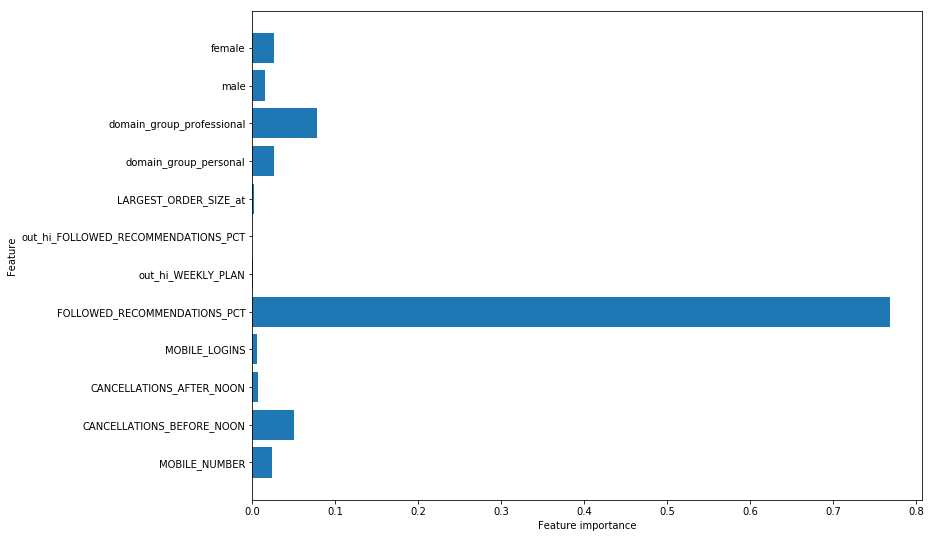

In [39]:
plot_feature_importances(gbm_tuned_fit, X_train)

<br>
We can see that "FOLLOW_RECOMMENDATIONS_PCT" and "domain_group_professional" are the two most important variables in our final model.<br><br>
It aligns with our hypothesis in the beginning that we assume people like wine because it helps enhance the taste of food. <br><br>
For further insights and recommendations, please see write up report.
<br>

<h2>Correlation Matrix</h2><br>

Next, let look at the confusion matrix to see how our predictions work in term of business perspective.

In [40]:
# user-defined function: visual_cm
def visual_cm(true_y, pred_y, labels = None, display = True):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y  : true values for the response variable
pred_y  : predicted values for the response variable
labels  : class 0 and class 1 labels respectively, default None
display : whether or not to run plt.show() (not recommended when using methods such as plt.subplots()), default True
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    if display == True:
        
        # heatmap
        sns.heatmap(cm,
                    annot       = True,
                    xticklabels = lbls,
                    yticklabels = lbls,
                    cmap        = 'Blues',
                    fmt         = 'g')


        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix of the Classifier')
        
        plt.show()
        
        
    elif display == False:
        # saved heatmap
        hmp = sns.heatmap(cm,
                          annot       = True,
                          xticklabels = lbls,
                          yticklabels = lbls,
                          cmap        = 'Blues',
                          fmt         = 'g')

        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix of the Classifier')
        
        return hmp
        
        
    else:
        print("Unexpected input. Please email me your input and I will debug the code.")

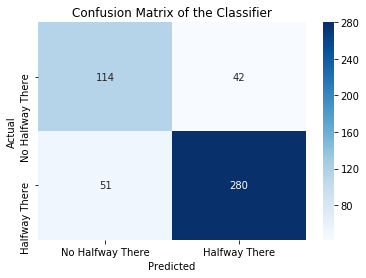

In [47]:
# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.08,
                                       max_depth     = 1,
                                       subsample     = 0.7,
                                       n_estimators  = 170,
                                       random_state  = 222)


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set and NEW PORBABILITY THRESHOLD
threshold = 0.5
gbm_THRESH_pred = np.where(gbm_tuned_fit.predict_proba(X_test)[:,1] > threshold, 1, 0)

# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = gbm_THRESH_pred,
          labels = ['No Halfway There', 'Halfway There'],
          display= True)

The confusion matrix can be read as follows:

~~~
                   |
  True Negatives   |  False Positives
  (correct)        |  (incorrect)
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
  (incorrect)      |  (correct)
                   |
~~~

<br>
In terms of our model:<br>

~~~
                                                       |
 PREDICTED: No Halfway_There  (CROSS_SELL_SUCCESS= 0)  | PREDICTED: Join Halfway_There (CROSS_SELL_SUCCESS= 1)
 ACTUAL:    No Halfway_There  (CROSS_SELL_SUCCESS= 0)  | ACTUAL:    No Halfway_There   (CROSS_SELL_SUCCESS= 0)
                                                       |
-------------------------------------------------------|-------------------------------------------------------
                                                       |
 PREDICTED: No Halfway_There   (CROSS_SELL_SUCCESS= 0) | PREDICTED: Join Halfway_There (CROSS_SELL_SUCCESS= 1)
 ACTUAL:    Join Halfway_There (CROSS_SELL_SUCCESS= 1) | ACTUAL:    Join Halfway_There (CROSS_SELL_SUCCESS= 1)
                                                       |  
~~~

There are two way that we set the threshold<br>
1. Minimize the false positive: Sometimes, you want to reduce the marketing cost that you waste on advertising to the people who are not interested in the promotion. We can minimize the predictions that are false positive to save the cost on this part.<br>
2. Minimize the false negative: When you predict that these people are not interested in the promotion, but they are interested. You might lose a chance that customers will subscribe to the promotion because you ignore them.<br><br>

In our case, I believe that it will cost us more if we ignore some customers that willing to subscribe to our promotion. We might lose our chance to get more subscribers and earn more revenues. So, I will set a threshold to minimize the false negative.<br>

- The predictions that lie between 0 to 0.25 will be 0
- The predictions that lie between 0.25 to 1 will be 1

In [48]:
# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.08,
                                       max_depth     = 1,
                                       subsample     = 0.7,
                                       n_estimators  = 170,
                                       random_state  = 222)


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict_proba(X_test)[:,1]


# PREDICTING based on the testing set and NEW PORBABILITY THRESHOLD
threshold = 0.25
gbm_THRESH_pred = np.where(gbm_tuned_fit.predict_proba(X_test)[:,1] > threshold, 1, 0)

# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('Testing  AUC     :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_THRESH_pred).round(4))

Training ACCURACY: 0.8163
Testing  ACCURACY: 0.809
Testing  AUC     : 0.5963


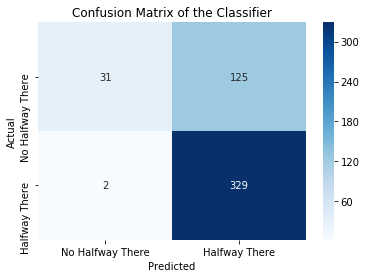

In [49]:
# calling the visual_cm function
visual_cm(true_y  = y_test,
          pred_y  = gbm_THRESH_pred,
          labels  = ['No Halfway There', 'Halfway There'],
          display = True)

<br>As a result, we have only 2 predictions that are false negative. However, the AUC score reduced from 0.9 to 0.6. This tradeoff is the decision that the executive team has to make between the higher AUC score or lower false negative.